# This analysis delves into the nutritional composition of McDonald's menu items, leveraging data visualization and statistical techniques to uncover insights.

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', None)
df=pd.read_csv(r'Nutrical.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [3]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


The dataset comprises columns that categorize food and beverage items, specify item names, indicate portion sizes, and provide detailed nutritional information, including values for calories, fat, protein, carbohydrates, and other nutrients.

In [4]:
df.shape

(260, 24)

In [5]:
df.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

In [42]:
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In this dataset there are no missing values so we are good to proceed with any further analysis


In [45]:
df.duplicated().sum()

np.int64(0)

There is no duplicate values in the data 

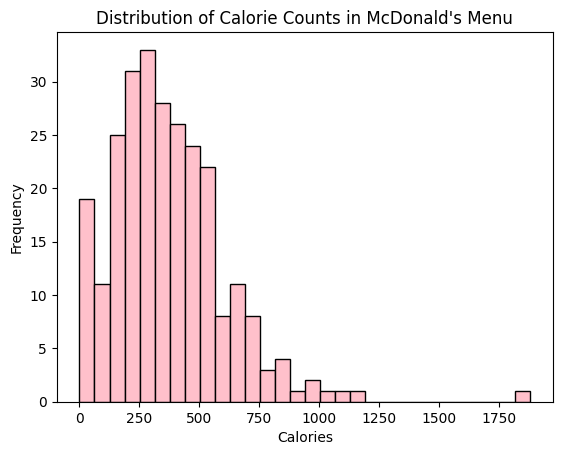

In [78]:
# Histogram of calorie distribution
plt.hist(df['Calories'], bins=30, color='pink', edgecolor='black')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calorie Counts in McDonald\'s Menu')
plt.show()

The calorie distribution is skewed to the right, with an average of 368 calories and a standard deviation of 240. The majority of menu items fall within the 200-500 calorie range.

In [23]:
print(df['Calories'].describe())

count     260.000000
mean      368.269231
std       240.269886
min         0.000000
25%       210.000000
50%       340.000000
75%       500.000000
max      1880.000000
Name: Calories, dtype: float64


This summary provides a basic understanding of the calorie distribution in the dataset. It helps to identify the range of calorie values, the central tendency, and the spread of the data.

In [26]:
# Calculate average nutritional content by category
category_avg = df.groupby('Category')[['Calories', 'Total Fat', 'Protein', 'Carbohydrates']].mean()
print(category_avg)


                      Calories  Total Fat    Protein  Carbohydrates
Category                                                           
Beef & Pork         494.000000  24.866667  27.333333      40.133333
Beverages           113.703704   0.092593   1.333333      28.814815
Breakfast           526.666667  27.690476  19.857143      49.761905
Chicken & Fish      552.962963  26.962963  29.111111      49.074074
Coffee & Tea        283.894737   8.021053   8.863158      44.526316
Desserts            222.142857   7.357143   4.000000      34.857143
Salads              270.000000  11.750000  19.833333      21.666667
Smoothies & Shakes  531.428571  14.125000  10.857143      90.428571
Snacks & Sides      245.769231  10.538462   8.384615      29.153846


There is a wide range of calorie counts across different categories, with "Beef & Pork" and "Chicken & Fish" generally having higher calorie counts.
"Beverages" have the lowest average calorie count.
Consumers looking for lower-calorie options might consider "Beverages" or "Salads."
For a higher protein intake, "Beef & Pork" and "Chicken & Fish" categories are good choices.
The calorie content of "Coffee & Tea" and "Desserts" can vary significantly based on the specific items and added ingredients.


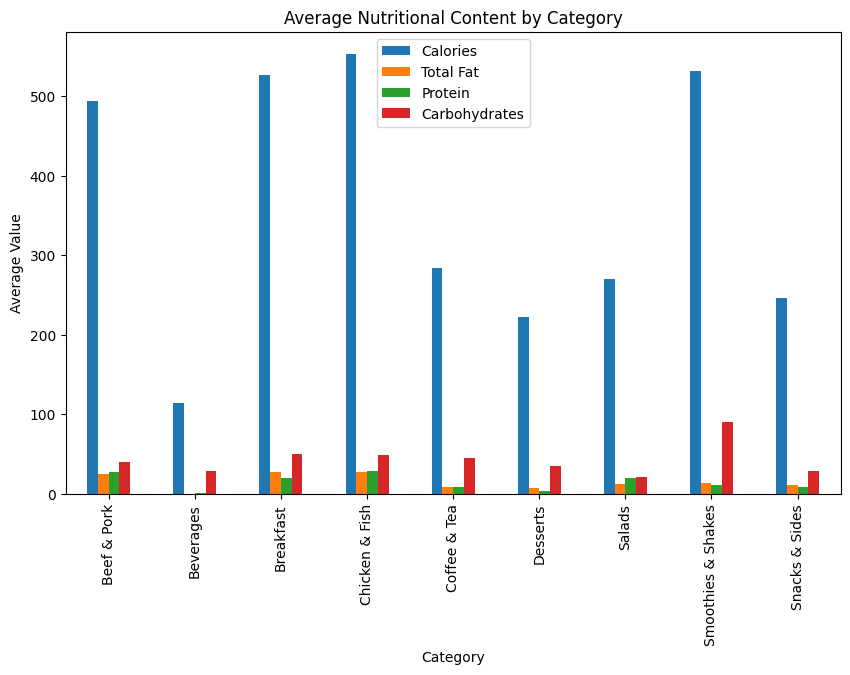

In [55]:
category_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average Nutritional Content by Category')
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.show()

**Average Nutritional Content of Popular Menu Categories:**

**Breakfast:** The Breakfast category is popular for its convenience and balanced nutrition, making it a great start to the day. Many customers enjoy pairing their breakfast with Coffee & Tea.

**Lunch:** The Chicken & Fish category is well-liked, as it provides essential nutrients and is rich in calories, carbohydrates, vitamins, and sodium. Combining this category with Salads and Smoothies & Shakes boosts nutritional value.

**Dinner:** The Beef & Pork category is a favorite for dinner, offering options like burgers and wraps. Many people pair these meals with Beverages, Desserts, and Snacks & Sides. However, these meals can be high in fat, cholesterol, and sugar, which may not be ideal for a healthy diet.

In [27]:
# Identify high-calorie items
high_calorie_items = df.sort_values(by='Calories', ascending=False).head(10)
print(high_calorie_items)

               Category  \
82       Chicken & Fish   
32            Breakfast   
31            Breakfast   
34            Breakfast   
33            Breakfast   
81       Chicken & Fish   
253  Smoothies & Shakes   
249  Smoothies & Shakes   
246  Smoothies & Shakes   
251  Smoothies & Shakes   

                                                             Item  \
82                                   Chicken McNuggets (40 piece)   
32                    Big Breakfast with Hotcakes (Large Biscuit)   
31                  Big Breakfast with Hotcakes (Regular Biscuit)   
34     Big Breakfast with Hotcakes and Egg Whites (Large Biscuit)   
33   Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit)   
81                                   Chicken McNuggets (20 piece)   
253                          McFlurry with M&M’s Candies (Medium)   
249                                       Chocolate Shake (Large)   
246                                      Strawberry Shake (Large)   
251         

In [28]:
# Identify low-calorie items
low_calorie_items = df.sort_values(by='Calories').head(10)
print(low_calorie_items)

         Category                     Item  Serving Size  Calories  \
140  Coffee & Tea         Iced Tea (Child)  12 fl oz cup         0   
139  Coffee & Tea         Iced Tea (Large)  30 fl oz cup         0   
136     Beverages      Dasani Water Bottle    16.9 fl oz         0   
115     Beverages       Diet Coke (Medium)  21 fl oz cup         0   
122     Beverages   Diet Dr Pepper (Small)  16 fl oz cup         0   
116     Beverages        Diet Coke (Large)  30 fl oz cup         0   
114     Beverages        Diet Coke (Small)  16 fl oz cup         0   
117     Beverages        Diet Coke (Child)  12 fl oz cup         0   
138  Coffee & Tea        Iced Tea (Medium)  21 fl oz cup         0   
123     Beverages  Diet Dr Pepper (Medium)  21 fl oz cup         0   

     Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
140                  0        0.0                          0            0.0   
139                  0        0.0                          0           

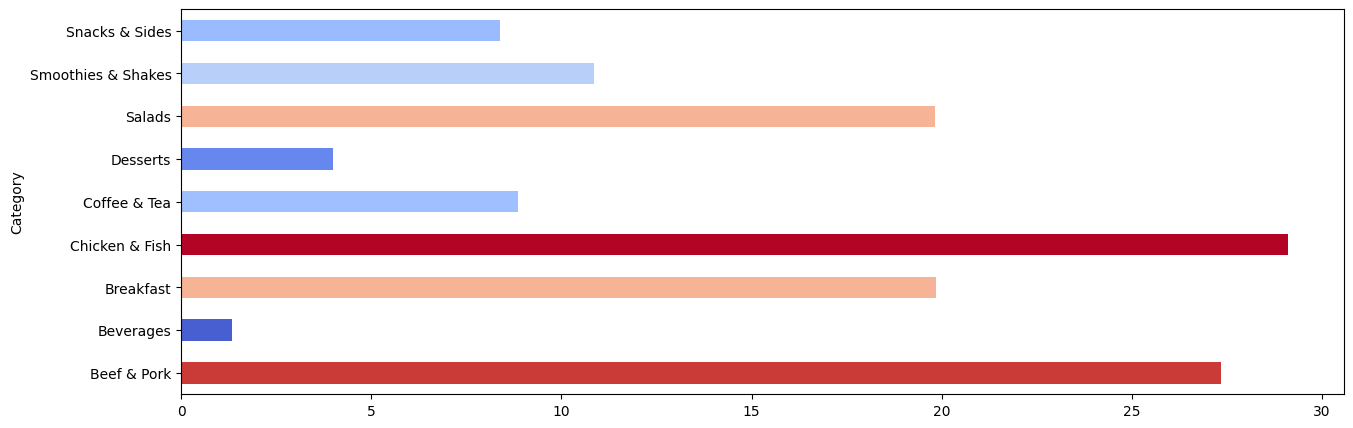

In [75]:
df1=df.groupby(['Category'])['Protein'].mean()
df1.plot(kind='barh',figsize=(15,5),color=cmap(df1.values / df1.max()))
cmap = plt.cm.get_cmap('coolwarm')

The bar chart reveals that chicken and fish are the top protein sources among the categories analyzed, followed closely by beef and pork. Beverages, as anticipated, exhibit the lowest protein content

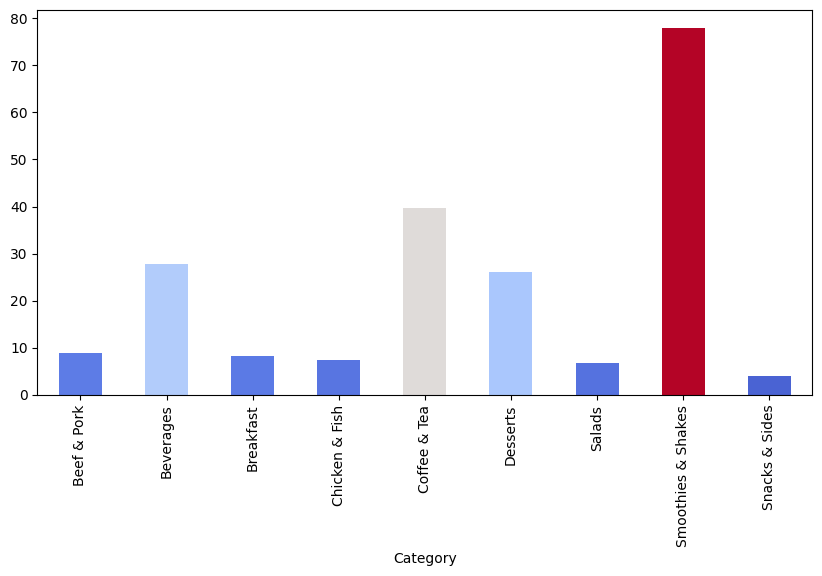

In [76]:
df1=df.groupby(['Category'])['Sugars'].mean()
df1.plot(kind='bar',figsize=(10,5), color=cmap(df1.values / df1.max()))
cmap = plt.cm.get_cmap('coolwarm')

A closer look reveals that smoothies and shakes are the primary contributors to sugar intake, with their sugar content nearly twice that of coffee and tea. Beverages and desserts also contain substantial amounts of sugar, significantly exceeding the sugar levels found in salads, breakfast items, and other categories. These findings reinforce the importance of mindful consumption of sugary drinks

<Axes: xlabel='Category'>

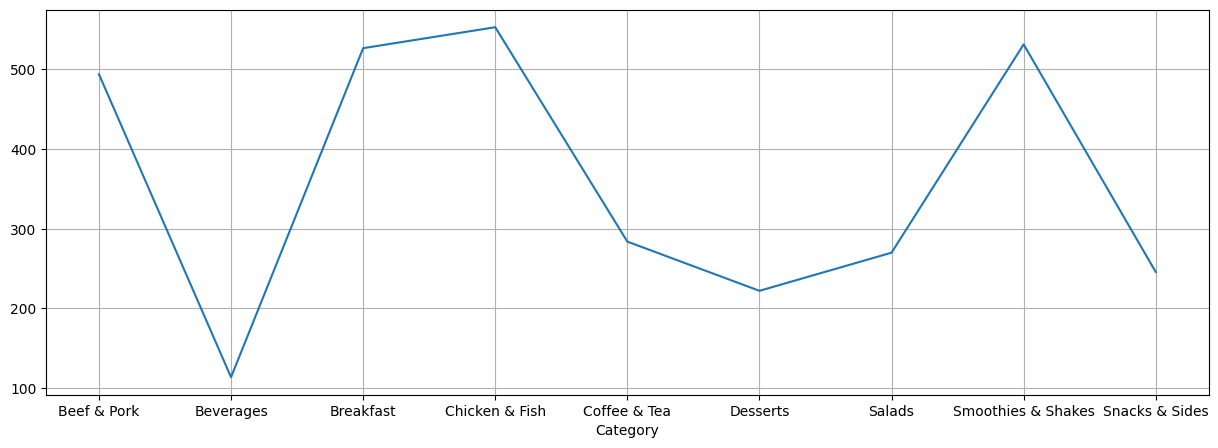

In [38]:
df1=df.groupby(['Category'])['Calories'].mean()
df1.plot(kind='line',figsize=(15,5),grid=True)

The analysis reveals that chicken and fish are the top contributors to calorie intake, followed closely by breakfast and smoothie/shake categories. To better understand the caloric composition of breakfast, further investigation into specific breakfast items is necessary.

In [39]:
df1=df[df['Category']=='Breakfast'][['Item','Calories']]
df1.sort_values(by='Calories',ascending=False).head(10)

,Item,Calories
32,Big Breakfast with Hotcakes (Large Biscuit),1150
31,Big Breakfast with Hotcakes (Regular Biscuit),1090
34,Big Breakfast with Hotcakes and Egg Whites (Large Biscuit),1050
33,Big Breakfast with Hotcakes and Egg Whites (Regular Biscuit),990
28,Big Breakfast (Large Biscuit),800
27,Big Breakfast (Regular Biscuit),740
30,Big Breakfast with Egg Whites (Large Biscuit),690
26,"Steak, Egg & Cheese Bagel",670
29,Big Breakfast with Egg Whites (Regular Biscuit),640
24,"Bacon, Egg & Cheese Bagel",620


A surprising finding is that incorporating egg whites into a Big Breakfast with Hotcakes can lead to a decrease in overall calories. Additionally, opting for steak over bacon in an Egg and Cheese Bagel can significantly increase its calorie content.

In [40]:
df.groupby(['Category']).max()['Calcium (% Daily Value)'].sort_values(ascending=False)

Category
Smoothies & Shakes    70
Coffee & Tea          60
Beef & Pork           30
Breakfast             30
Beverages             30
Chicken & Fish        30
Desserts              25
Salads                15
Snacks & Sides        10
Name: Calcium (% Daily Value), dtype: int64

<Axes: ylabel='Item'>

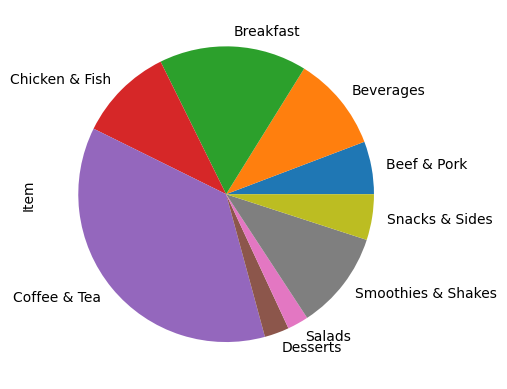

In [41]:
df.groupby(['Category']).count()['Item'].plot(kind='pie')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Breakfast'),
  Text(1, 0, 'Beef & Pork'),
  Text(2, 0, 'Chicken & Fish'),
  Text(3, 0, 'Salads'),
  Text(4, 0, 'Snacks & Sides'),
  Text(5, 0, 'Desserts'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Coffee & Tea'),
  Text(8, 0, 'Smoothies & Shakes')])

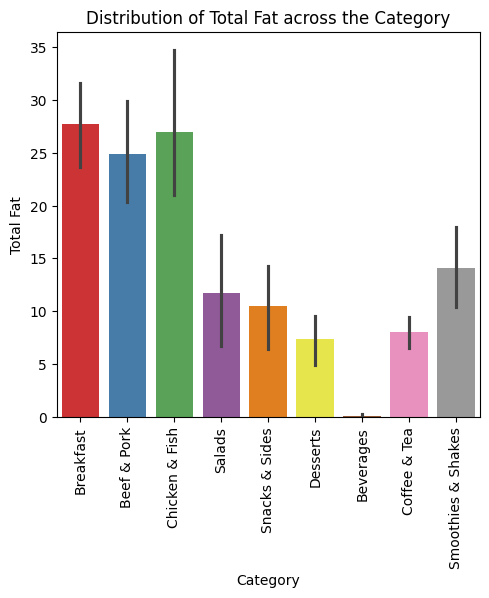

In [95]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data= df, x= 'Category', y= 'Total Fat', palette= 'Set1',hue='Category')
plt.title('Distribution of Total Fat across the Category')
plt.xlabel('Category')
plt.ylabel('Total Fat')
plt.xticks(rotation= 90)

The Breakfast category exhibits the highest average total fat content, accounting for approximately 43% of the daily value. Chicken & Fish follow closely with around 40%. Beverages, on the other hand, have minimal total fat content.

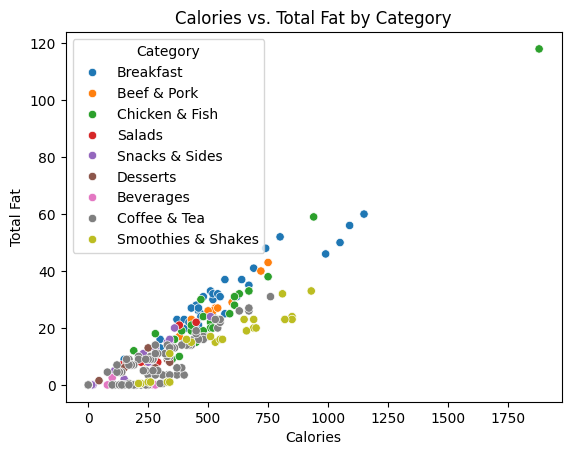

In [49]:
sns.scatterplot(x='Calories', y='Total Fat', data=df, hue='Category')
plt.title('Calories vs. Total Fat by Category')
plt.show()

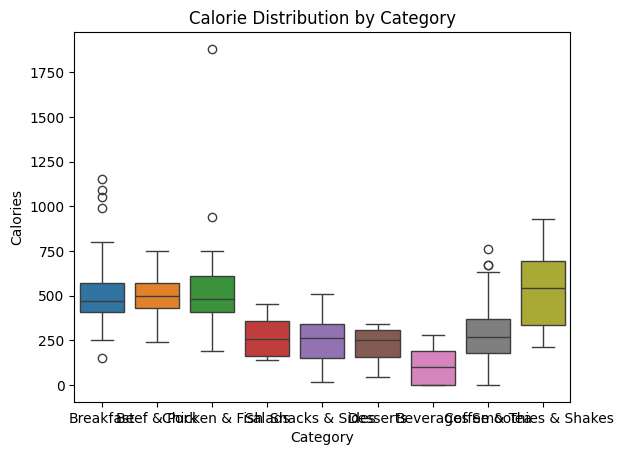

In [88]:
sns.boxplot(x='Category', y='Calories', data=df, palette='tab10')
plt.title('Calorie Distribution by Category')
plt.show()

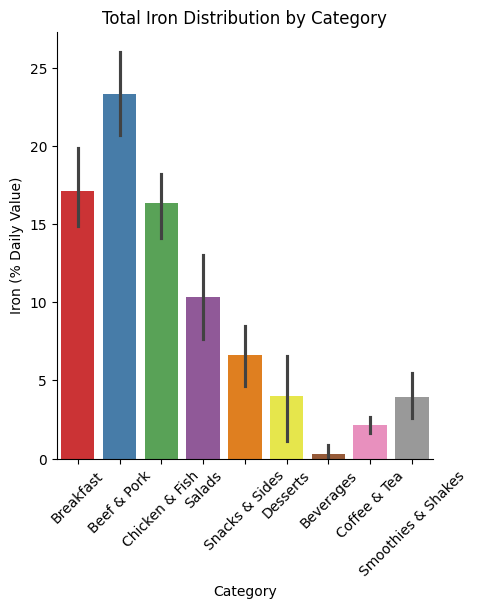

In [99]:
sns.catplot(x='Category', y='Iron (% Daily Value)', kind='bar', data=df, palette='Set1')
plt.title('Total Iron Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Iron (% Daily Value)')
plt.xticks(rotation=45)
plt.show()

The bar chart indicates that Beef & Pork items are the richest source of iron, followed closely by Breakfast and Chicken & Fish. Salads provide a moderate amount of iron, while Snacks & Sides, Desserts, Beverages, and Coffee & Tea contribute minimal amounts of iron.

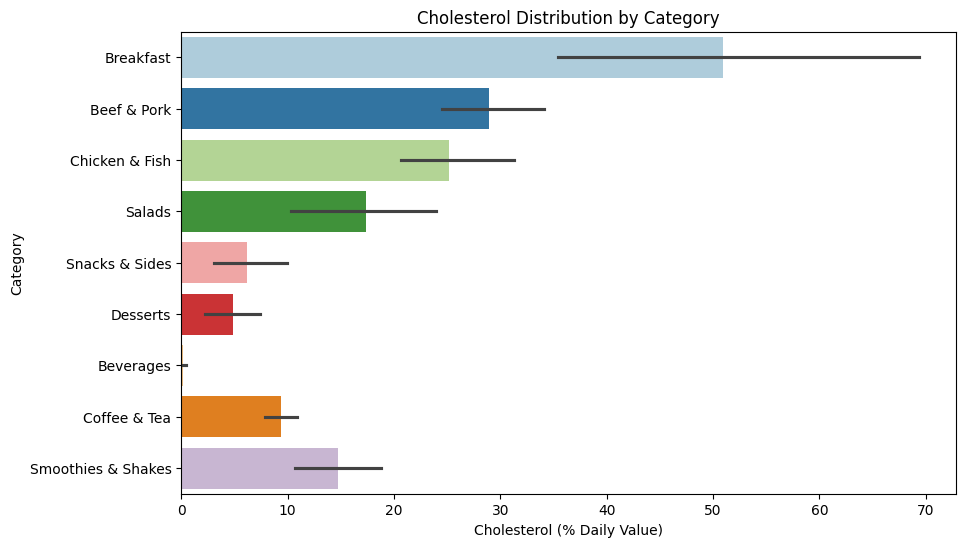

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cholesterol (% Daily Value)', y='Category', data=df, orient='h', palette='Paired')
plt.xlabel('Cholesterol (% Daily Value)')
plt.ylabel('Category')
plt.title('Cholesterol Distribution by Category')
plt.show()

The Breakfast category exhibits the highest average cholesterol content, accounting for approximately 50% of the daily value. Beef & Pork follow with around 30%, while Chicken & Fish has a slightly lower average of 25%. Beverages, on the other hand, have minimal cholesterol content.

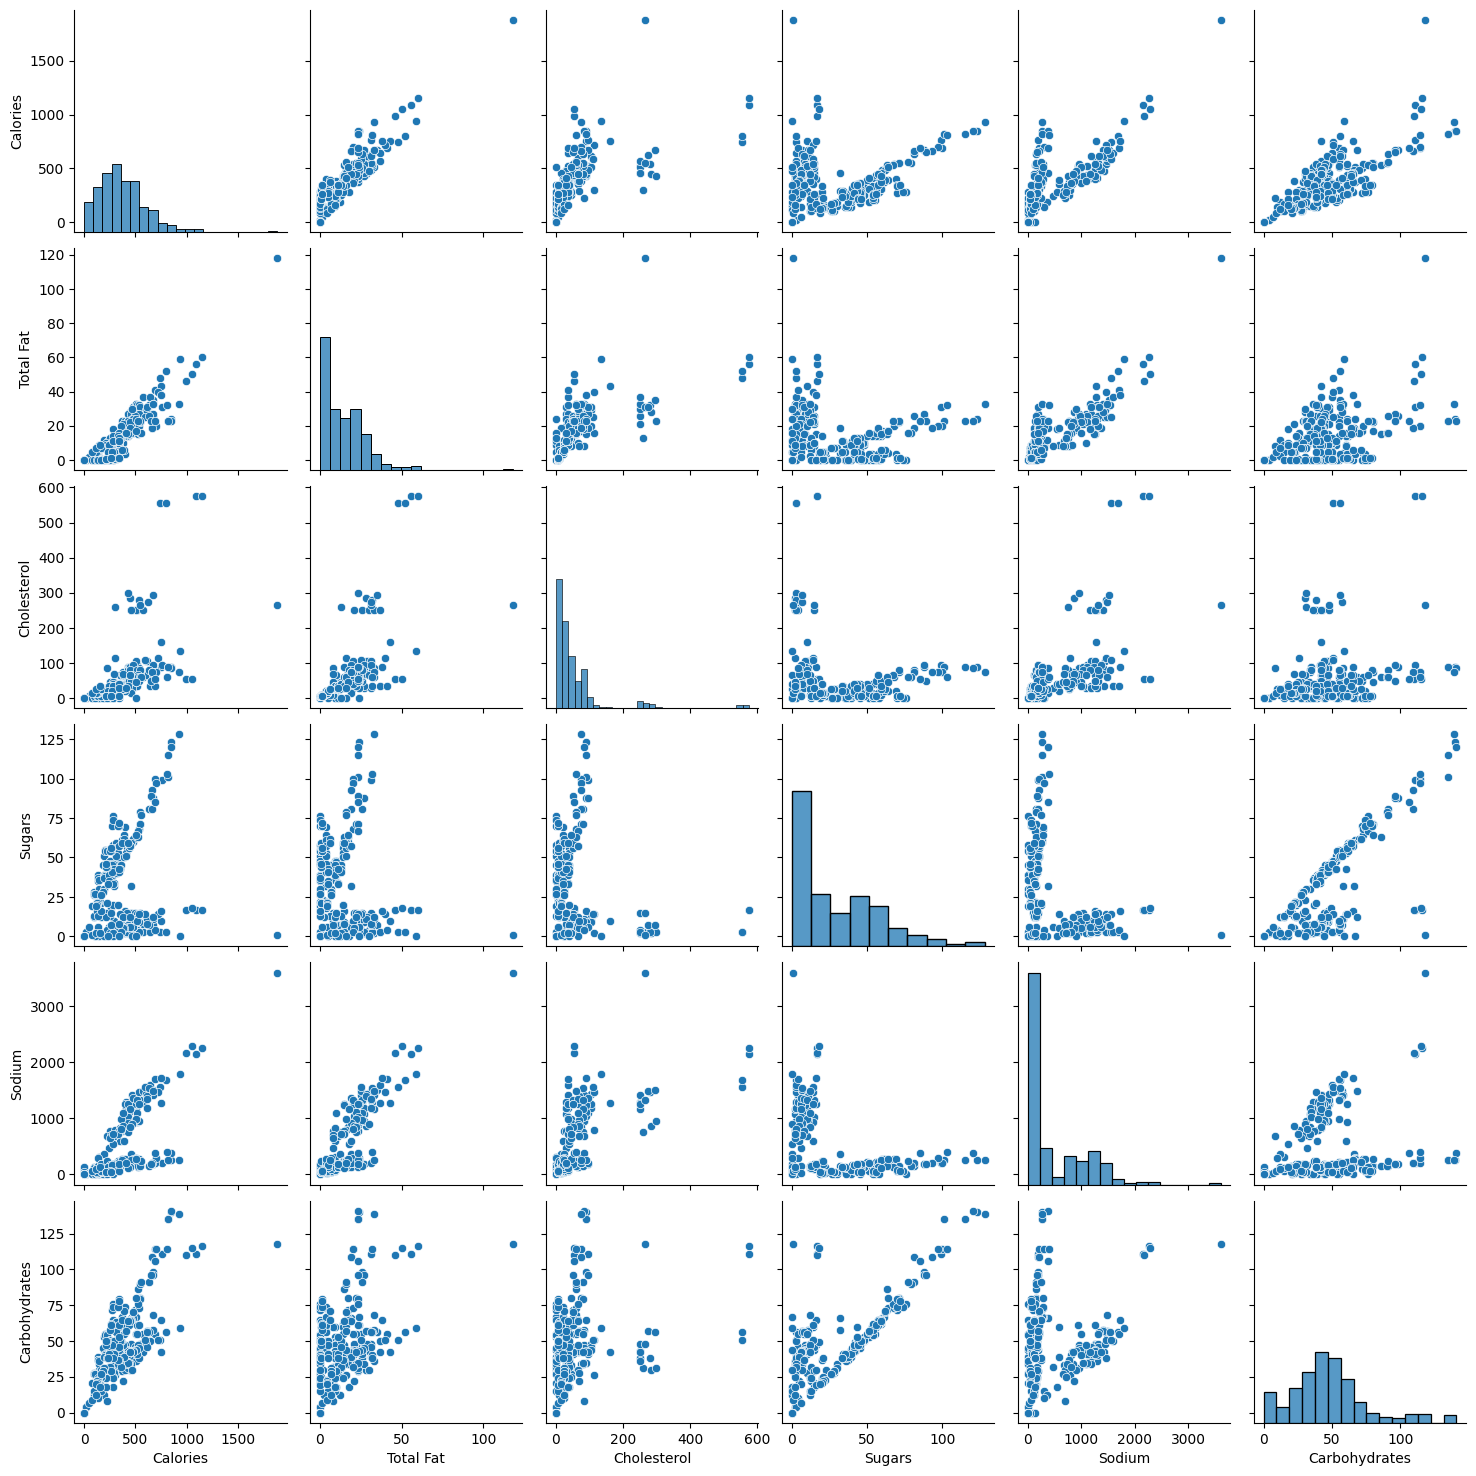

In [59]:
sns.pairplot(df[['Calories','Total Fat','Cholesterol','Sugars','Sodium','Carbohydrates']])

A strong positive correlation exists between calories and total fat, suggesting that items with high calorie content tend to be high in fat as well. Additionally, a notable correlation is observed between sugars and carbohydrates, indicating that items with high sugar content often have high carbohydrate content.

# Summarize the findings and insights from the analysis

## Key Findings:

**Calorie Distribution:**
The majority of McDonald's menu items are high in calories, particularly items like burgers, fries, and desserts.

**Nutritional Content:**
The menu offers a mix of items with varying levels of fat, protein, and carbohydrates. While some items are high in fat and calories, others, such as salads, can be considered healthier options.

**Category-wise Comparison:**
Different food categories exhibit distinct nutritional profiles. For instance, burgers and fries tend to be higher in calories and fat, while salads and fruit cups are generally lower.

## How the Analysis Benefits McDonald's Customers and the Organization:

*For Customers:*

**Informed Choices:** Empowers customers to make informed decisions about their food choices by providing transparent nutritional information.
Healthier Options: Highlights healthier options on the menu, encouraging customers to make more balanced choices.

**Allergen Awareness:** Helps customers with dietary restrictions identify suitable menu items.

*For the Organization:*

**Menu Optimization:** Identifies opportunities to improve the nutritional profile of menu items, such as reducing sodium, sugar, and unhealthy fats.

**Marketing and Branding:** Develops marketing campaigns that emphasize healthier options and nutritional benefits.

**Regulatory Compliance:** Ensures compliance with food labeling regulations and nutritional guidelines.

**Customer Satisfaction:** Addresses customer concerns about health and wellness, leading to increased customer satisfaction and loyalty.

## Recommendations:

**Promote Healthier Options:** Highlight healthier options on menus and through marketing campaigns.

**Offer Customizable Options:** Allow customers to customize their orders to reduce calorie and fat intake.

**Provide Clear Nutritional Information:** Make nutritional information easily accessible to customers.

**Consider Plant-Based Options:** Expand the range of plant-based and vegetarian options.

**Monitor and Improve:** Continuously monitor the nutritional profile of menu items and make adjustments as needed.

By understanding the nutritional composition of their menu, McDonald's can make informed decisions to improve the overall healthfulness of their offerings and cater to the evolving needs of their customers.








